## `Import Libraries`

In [60]:
import pandas as pd
import geopandas as gpd
from plotnine import *
from geodatasets import get_path
import matplotlib.pyplot as plt

## `Import Data sets`

In [61]:
df1 = pd.read_csv('../data/processed/unicef_indicator1_cleaned.csv')
df2 = pd.read_csv('../data/processed/unicef_indicator2_cleaned.csv')

In [62]:
df1.head()

,Country,alpha_2_code,alpha_3_code,numeric_code,Indicator,time_period,Value,Gender,unit_multiplier,unit_of_measure,observation_status,observation_confidentaility,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Afghanistan,AF,AFG,4,Percentage of adolescents (aged 15-19 years) w...,2016,0.1,Female,Units,%,Estimated value,Free,End of fieldwork,15 to 19 years old
1,Afghanistan,AF,AFG,4,Percentage of adolescents (aged 15-19 years) w...,2016,0.5,Male,Units,%,Estimated value,Free,End of fieldwork,15 to 19 years old
2,Afghanistan,AF,AFG,4,Percentage of adolescents (aged 15-19 years) w...,2016,0.3,Total,Units,%,Estimated value,Free,End of fieldwork,15 to 19 years old
3,Albania,AL,ALB,8,Percentage of adolescents (aged 15-19 years) w...,2016,24.2,Female,Units,%,Estimated value,Free,End of fieldwork,15 to 19 years old
4,Albania,AL,ALB,8,Percentage of adolescents (aged 15-19 years) w...,2016,50.5,Male,Units,%,Estimated value,Free,End of fieldwork,15 to 19 years old


In [63]:
df2.head()

,Country,alpha_2_code,alpha_3_code,numeric_code,Indicator,Year,Value,Gender,unit_of_measure,observation_confidentaility,current_age
0,Afghanistan,AF,AFG,4,Proportion of population using improved latrin...,2000,17.910421,Total,%,NaN,Total
1,Afghanistan,AF,AFG,4,Proportion of population using improved latrin...,2001,17.904081,Total,%,NaN,Total
2,Afghanistan,AF,AFG,4,Proportion of population using improved latrin...,2002,19.763268,Total,%,NaN,Total
3,Afghanistan,AF,AFG,4,Proportion of population using improved latrin...,2003,21.623249,Total,%,NaN,Total
4,Afghanistan,AF,AFG,4,Proportion of population using improved latrin...,2004,23.480898,Total,%,NaN,Total


## `World Map`

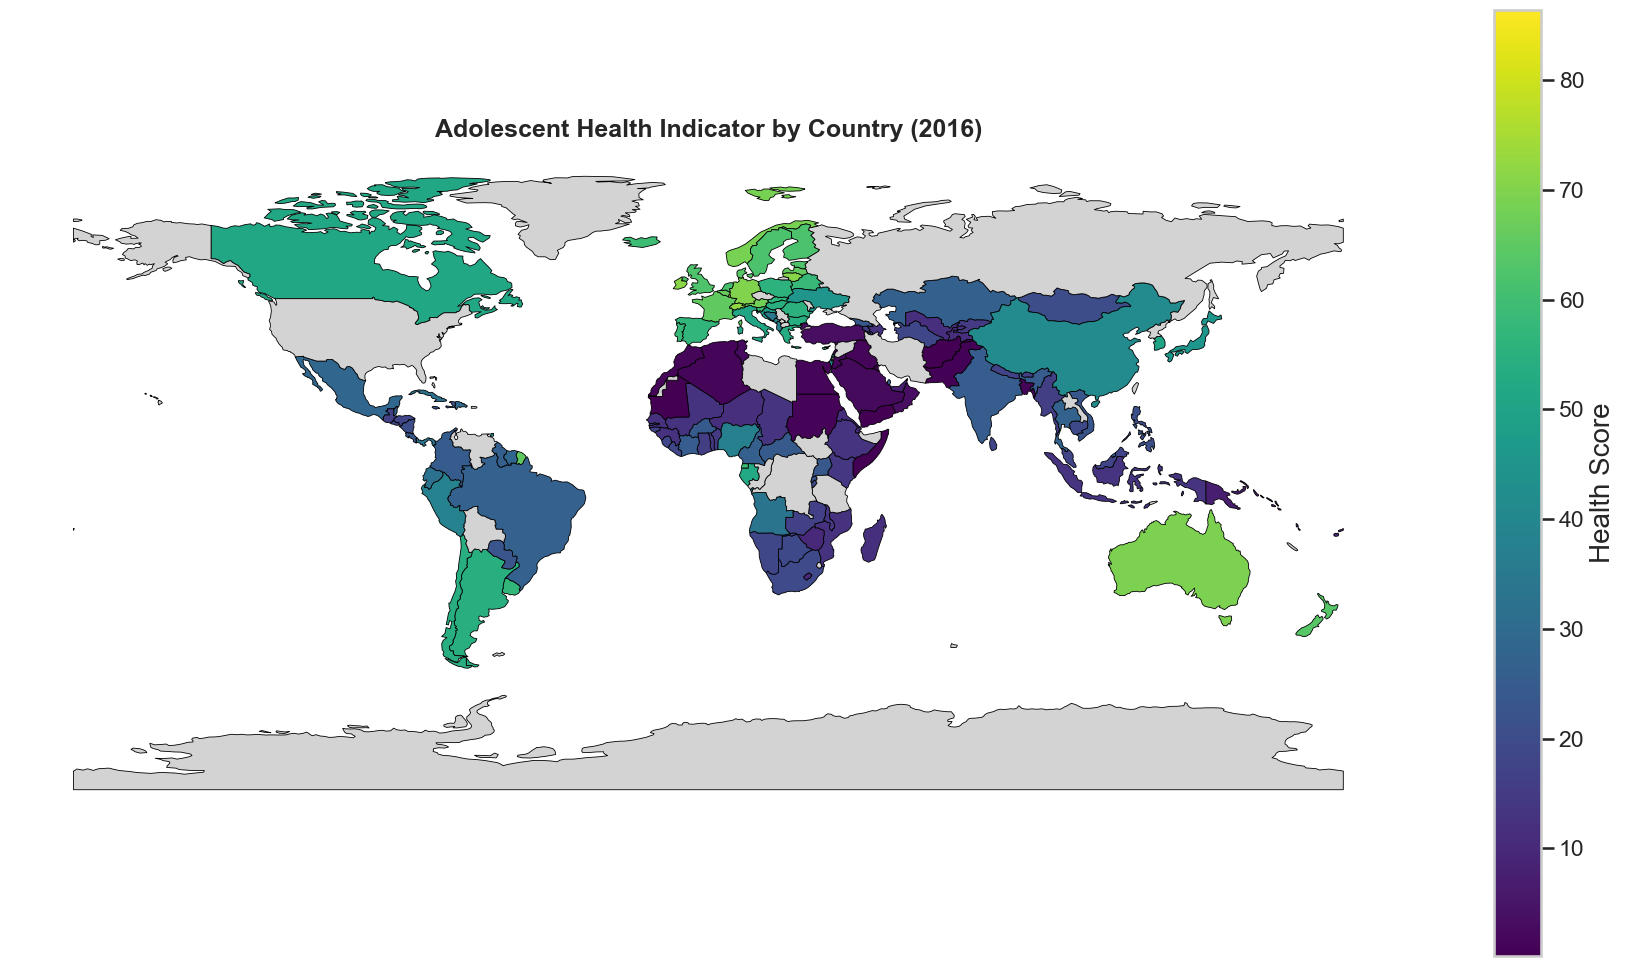

In [64]:
# Load shapefile
world = gpd.read_file("../data/shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Load your cleaned data
map_df = df1[df1["Gender"] == "Total"]

# Rename and merge
world = world.rename(columns={"ADMIN": "Country"})
merged = world.merge(map_df, on="Country", how="left")


fig, ax = plt.subplots(figsize=(18, 10))  

plot = merged.plot(
    column="Value",
    cmap="viridis",               
    linewidth=0.6,                
    edgecolor="black",            
    legend=True,
    ax=ax,
    missing_kwds={                
        "color": "lightgrey",
        "label": "No data"})

ax.set_title("Adolescent Health Indicator by Country (2016)", fontsize=18, fontweight='bold')

ax.axis("off")

colorbar = plot.get_figure().get_axes()[1]
colorbar.set_ylabel("Health Score", fontsize=20)

plt.tight_layout()
plt.show()


## `Bar Chart`

/var/folders/ln/8s8rnz7s3pv6jwy7khy_32yw0000gn/T/ipykernel_83847/2387632258.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



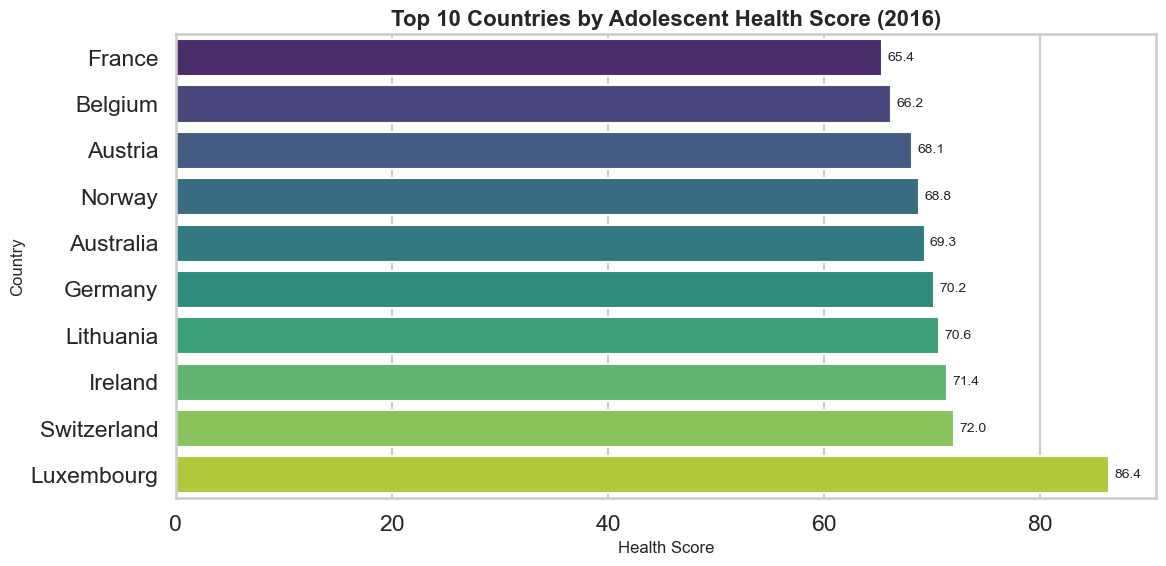

In [65]:
bar_df = df1[df1["Gender"] == "Total"].dropna(subset=["Value"])
top10 = bar_df.sort_values(by="Value", ascending=False).head(10).sort_values(by="Value") 

plt.figure(figsize=(12, 6))
ax = sns.barplot(y="Country", x="Value", data=top10, palette="viridis")

plt.title("Top 10 Countries by Adolescent Health Score (2016)", fontsize=16, weight='bold')
plt.xlabel("Health Score", fontsize=12)
plt.ylabel("Country", fontsize=12)

for i, row in enumerate(top10.itertuples()):
    plt.text(row.Value + 0.5, i, f"{row.Value:.1f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


## `Scatterplot with Linear Regression Line`

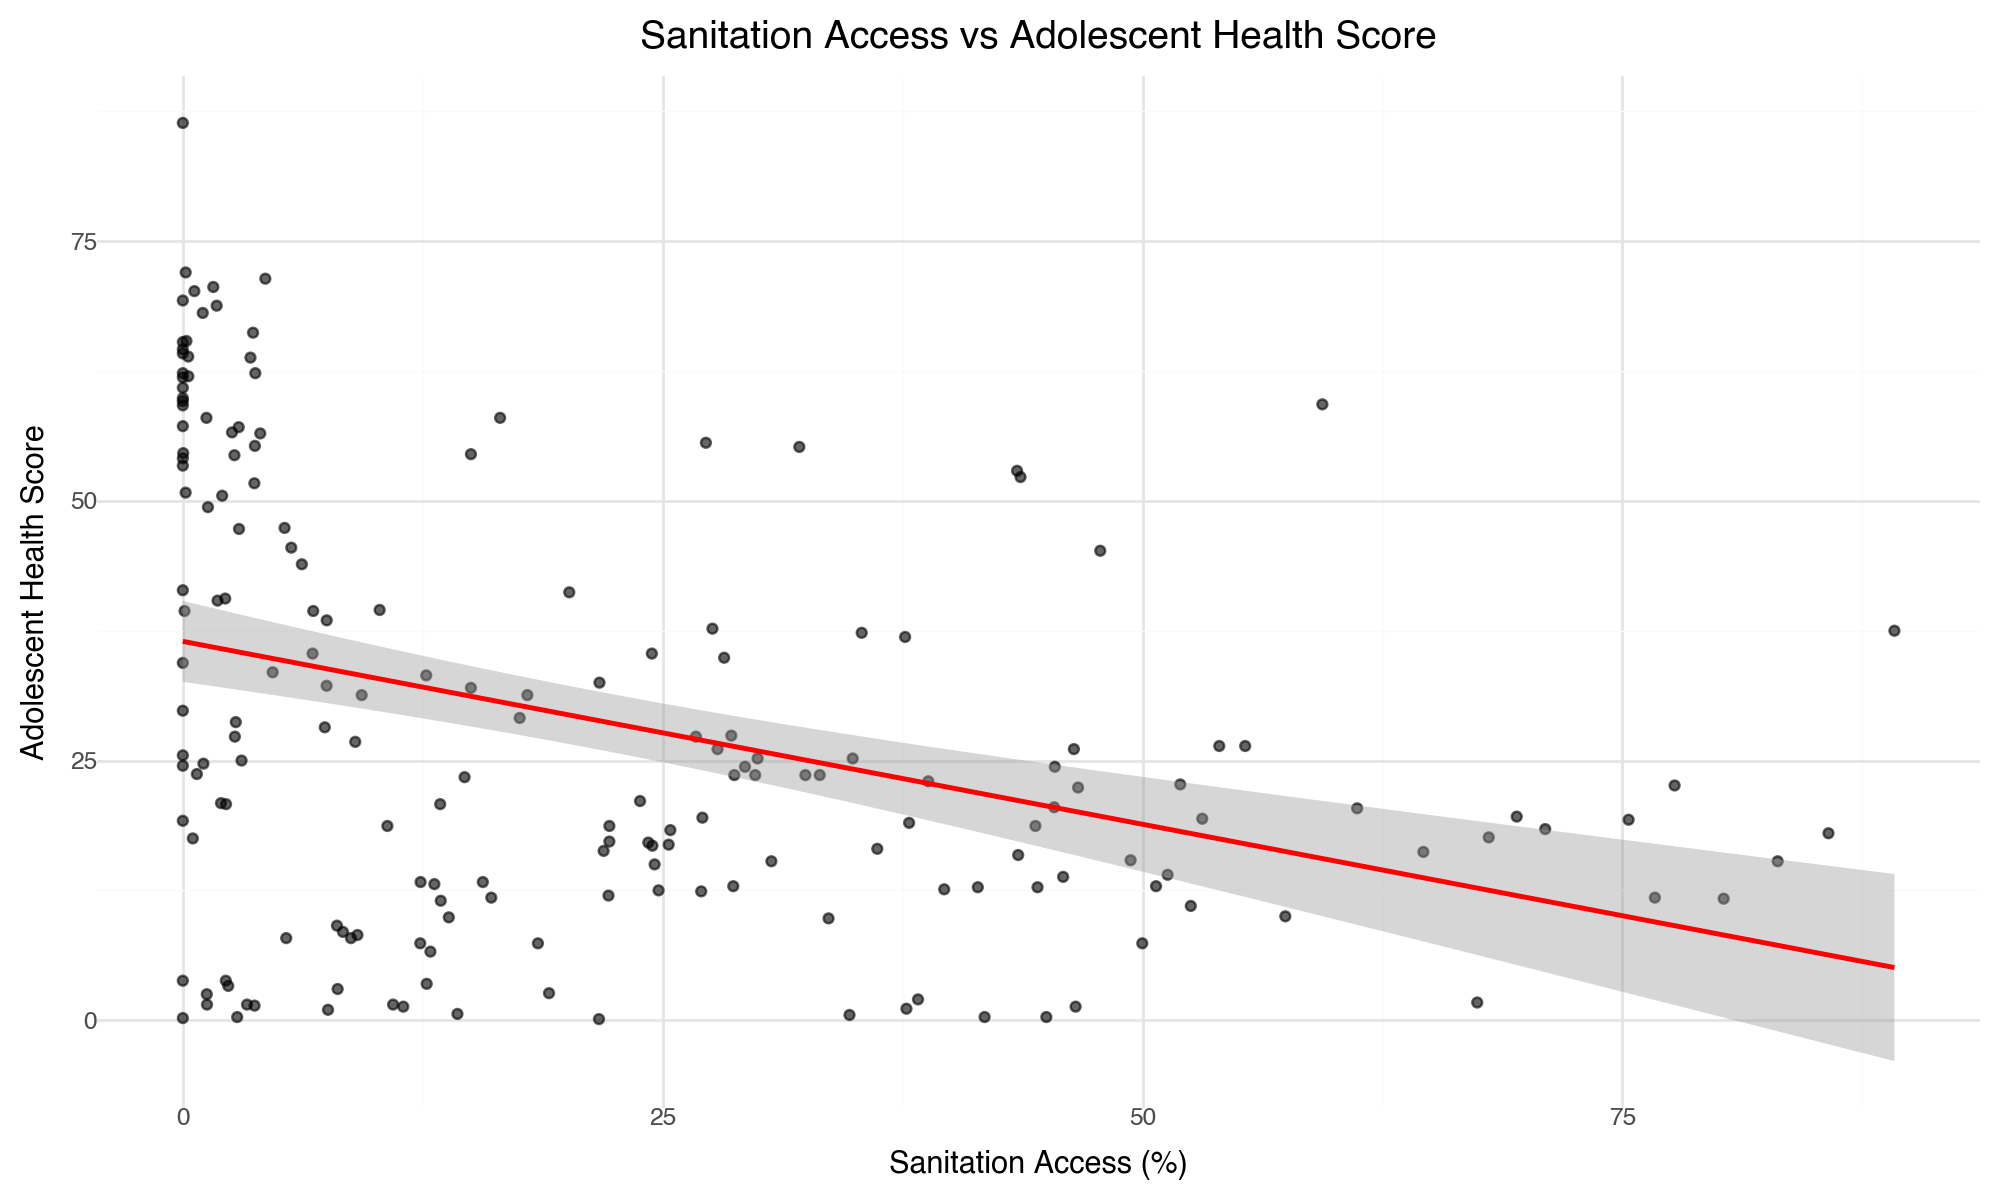

In [78]:
from plotnine import *
import pandas as pd

# Load and prepare merged_df if not already done
df1 = pd.read_csv('../data/processed/unicef_indicator1_cleaned.csv')
df2 = pd.read_csv('../data/processed/unicef_indicator2_cleaned.csv')
df2.rename(columns={"Year": "time_period"}, inplace=True)

df1 = df1[df1["Gender"] == "Total"]
df2 = df2[df2["Gender"] == "Total"]
merged_df = df1.merge(df2, on=["Country", "time_period"], suffixes=("_health", "_sanitation"))
merged_df = merged_df.dropna(subset=["Value_health", "Value_sanitation"])

# Plot using plotnine
plot = (
    ggplot(merged_df, aes(x='Value_sanitation', y='Value_health')) +
    geom_point(alpha=0.6) +
    geom_smooth(method='lm', color='red') +
    labs(
        title='Sanitation Access vs Adolescent Health Score',
        x='Sanitation Access (%)',
        y='Adolescent Health Score'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        plot_title=element_text(size=14, weight='bold')
    )
)

plot


## `Time-Series Chart`